# Verano FIME 2021

# (2017)

# PM2.5

In [1]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante1 = 'PM2_5'
# Se declaran las columnas a extraer de la base de datos
columns1 = ['timestamp', contaminante1]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante1 = pd.read_csv('filled.csv', usecols=columns1).dropna()
# Se convierten los strings a objeto datetime
strfdt1 = '%d-%b-%y %H'
dataframecontaminante1['timestamp'] = pd.to_datetime(dataframecontaminante1['timestamp'], errors = 'coerce', format=strfdt1)
# Se eliminan los espacios vacios
dataframecontaminante1 = dataframecontaminante1.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante1 = dataframecontaminante1.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00:00:00,99.00
1,2003-06-01 00:00:00,62.00
2,2003-06-01 00:00:00,29.00
3,2003-06-01 01:00:00,98.00
4,2003-06-01 01:00:00,75.00
...,...,...
528438,2018-12-31 23:00:00,22.58
528439,2018-12-31 23:00:00,199.00
528440,2018-12-31 23:00:00,111.00
528441,2018-12-31 23:00:00,295.00


In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante1['timestamp'] = dataframecontaminante1['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00,99.00
1,2003-06-01 00,62.00
2,2003-06-01 00,29.00
3,2003-06-01 01,98.00
4,2003-06-01 01,75.00
...,...,...
528438,2018-12-31 23,22.58
528439,2018-12-31 23,199.00
528440,2018-12-31 23,111.00
528441,2018-12-31 23,295.00


In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño1 = dataframecontaminante1.loc[dataframecontaminante1['timestamp'].str.startswith(año)]
dataframecontaminanteaño1 = dataframecontaminanteaño1.reset_index(drop=True)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2017-01-01 01,349.0
1,2017-01-01 02,187.0
2,2017-01-01 03,101.0
3,2017-01-01 04,81.0
4,2017-01-01 05,47.0
...,...,...
25200,2017-12-31 22,12.0
25201,2017-12-31 22,12.0
25202,2017-12-31 22,23.0
25203,2017-12-31 23,22.0


In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño1['timestamp'] = pd.to_datetime(dataframecontaminanteaño1['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2017-01-01 01:00:00,349.0
1,2017-01-01 02:00:00,187.0
2,2017-01-01 03:00:00,101.0
3,2017-01-01 04:00:00,81.0
4,2017-01-01 05:00:00,47.0
...,...,...
25200,2017-12-31 22:00:00,12.0
25201,2017-12-31 22:00:00,12.0
25202,2017-12-31 22:00:00,23.0
25203,2017-12-31 23:00:00,22.0


In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: x.week)
dataframecontaminanteaño1

,timestamp,PM2_5,sem
0,2017-01-01 01:00:00,349.0,1
1,2017-01-01 02:00:00,187.0,1
2,2017-01-01 03:00:00,101.0,1
3,2017-01-01 04:00:00,81.0,1
4,2017-01-01 05:00:00,47.0,1
...,...,...,...
25200,2017-12-31 22:00:00,12.0,1
25201,2017-12-31 22:00:00,12.0,1
25202,2017-12-31 22:00:00,23.0,1
25203,2017-12-31 23:00:00,22.0,1


In [6]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante1 = dataframecontaminanteaño1['sem'].value_counts()
semanascontaminante1 = semanascontaminante1.sort_index()
semanascontaminante1

1      228
2      263
3      283
4      209
5      320
6      335
7      362
8      321
9      303
10     335
11     298
12     280
13     344
14     408
15     408
16     414
17     389
18     401
19     304
20     201
21     285
22     256
23     289
24     240
25     257
26     222
27     241
28     219
29     379
30     507
31     529
32     604
33     662
34     621
35     631
36     511
37     674
38     668
39     449
40     476
41     537
42     877
43     821
44    1060
45     914
46    1028
47     909
48    1018
49     637
50     811
51     766
52     701
Name: sem, dtype: int64

In [7]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño1 = pd.DataFrame()
dataframesemanascontaminanteaño1['sem'] = semanascontaminante1.index
dataframesemanascontaminanteaño1[contaminante1] = ''
n = len(semanascontaminante1.index)
for i in range (n):
    registrossem = dataframecontaminanteaño1.loc[dataframecontaminanteaño1['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante1].mean()
    dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño1

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88304/3779165028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem


,sem,PM2_5
0,1,28.333333
1,2,32.098859
2,3,24.279152
3,4,18.54067
4,5,24.60625
5,6,25.585075
6,7,17.51105
7,8,16.53271
8,9,21.716172
9,10,19.704478


In [8]:
dataset1 = []
for i in dataframesemanascontaminanteaño1.index:
    dataset1.append(dataframesemanascontaminanteaño1[contaminante1][i])
dataset1

[28.333333333333332,
 32.09885931558935,
 24.279151943462896,
 18.54066985645933,
 24.60625,
 25.585074626865673,
 17.511049723756905,
 16.53271028037383,
 21.716171617161717,
 19.7044776119403,
 21.144295302013422,
 22.017857142857142,
 23.686046511627907,
 15.014705882352942,
 17.551470588235293,
 20.429951690821255,
 19.745501285347043,
 18.049875311720697,
 22.476973684210527,
 29.90547263681592,
 23.666666666666668,
 19.234375,
 15.131487889273357,
 17.725,
 18.3852140077821,
 18.7027027027027,
 14.883817427385893,
 13.287671232876713,
 17.189973614775724,
 17.962524654832347,
 17.733459357277884,
 16.374172185430464,
 20.178247734138974,
 13.159420289855072,
 13.849445324881142,
 15.356164383561644,
 19.212166172106826,
 14.449101796407186,
 13.601336302895323,
 15.892857142857142,
 17.126629422718807,
 19.470923603192702,
 17.33252131546894,
 28.220754716981133,
 24.803063457330417,
 24.214980544747082,
 18.49174917491749,
 20.656188605108056,
 20.932496075353217,
 28.7065351418

# PM10

In [9]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante2 = 'PM10'
# Se declaran las columnas a extraer de la base de datos
columns2 = ['timestamp', contaminante2]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante2 = pd.read_csv('filled.csv', usecols=columns2).dropna()
# Se convierten los strings a objeto datetime
strfdt2 = '%d-%b-%y %H'
dataframecontaminante2['timestamp'] = pd.to_datetime(dataframecontaminante2['timestamp'], errors = 'coerce', format=strfdt2)
# Se eliminan los espacios vacios
dataframecontaminante2 = dataframecontaminante2.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante2 = dataframecontaminante2.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante2

,timestamp,PM10
0,1993-01-01 00:00:00,41.0
1,1993-01-01 00:00:00,30.5
2,1993-01-01 00:00:00,60.0
3,1993-01-01 00:00:00,38.5
4,1993-01-01 01:00:00,41.0
...,...,...
1382706,2018-12-31 23:00:00,445.0
1382707,2018-12-31 23:00:00,134.0
1382708,2018-12-31 23:00:00,392.0
1382709,2018-12-31 23:00:00,40.0


In [10]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante2['timestamp'] = dataframecontaminante2['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante2

,timestamp,PM10
0,1993-01-01 00,41.0
1,1993-01-01 00,30.5
2,1993-01-01 00,60.0
3,1993-01-01 00,38.5
4,1993-01-01 01,41.0
...,...,...
1382706,2018-12-31 23,445.0
1382707,2018-12-31 23,134.0
1382708,2018-12-31 23,392.0
1382709,2018-12-31 23,40.0


In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño2 = dataframecontaminante2.loc[dataframecontaminante2['timestamp'].str.startswith(año)]
dataframecontaminanteaño2 = dataframecontaminanteaño2.reset_index(drop=True)
dataframecontaminanteaño2

,timestamp,PM10
0,2017-01-01 00,206.0
1,2017-01-01 00,487.0
2,2017-01-01 00,143.0
3,2017-01-01 00,241.0
4,2017-01-01 00,112.0
...,...,...
91464,2017-12-31 23,9.0
91465,2017-12-31 23,16.0
91466,2017-12-31 23,27.0
91467,2017-12-31 23,6.0


In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño2['timestamp'] = pd.to_datetime(dataframecontaminanteaño2['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño2

,timestamp,PM10
0,2017-01-01 00:00:00,206.0
1,2017-01-01 00:00:00,487.0
2,2017-01-01 00:00:00,143.0
3,2017-01-01 00:00:00,241.0
4,2017-01-01 00:00:00,112.0
...,...,...
91464,2017-12-31 23:00:00,9.0
91465,2017-12-31 23:00:00,16.0
91466,2017-12-31 23:00:00,27.0
91467,2017-12-31 23:00:00,6.0


In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: x.week)
dataframecontaminanteaño2

,timestamp,PM10,sem
0,2017-01-01 00:00:00,206.0,1
1,2017-01-01 00:00:00,487.0,1
2,2017-01-01 00:00:00,143.0,1
3,2017-01-01 00:00:00,241.0,1
4,2017-01-01 00:00:00,112.0,1
...,...,...,...
91464,2017-12-31 23:00:00,9.0,1
91465,2017-12-31 23:00:00,16.0,1
91466,2017-12-31 23:00:00,27.0,1
91467,2017-12-31 23:00:00,6.0,1


In [14]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante2 = dataframecontaminanteaño2['sem'].value_counts()
semanascontaminante2 = semanascontaminante2.sort_index()
semanascontaminante2

1     1885
2     1605
3     1590
4     1578
5     1648
6     1653
7     1653
8     1676
9     1673
10    1631
11    1617
12    1669
13    1660
14    1654
15    1653
16    1669
17    1659
18    1664
19    1663
20    1604
21    1653
22    1648
23    1664
24    1604
25    1585
26    1602
27    1639
28    1634
29    1543
30    1618
31    1687
32    1705
33    1745
34    1815
35    1802
36    1779
37    1739
38    1720
39    1532
40    1873
41    1980
42    2035
43    2079
44    1989
45    1995
46    2134
47    2044
48    2124
49    2091
50    2022
51    2163
52    2122
Name: sem, dtype: int64

In [15]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño2 = pd.DataFrame()
dataframesemanascontaminanteaño2['sem'] = semanascontaminante2.index
dataframesemanascontaminanteaño2[contaminante2] = ''
n = len(semanascontaminante2.index)
for i in range (n):
    registrossem = dataframecontaminanteaño2.loc[dataframecontaminanteaño2['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante2].mean()
    dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño2

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88304/1374211484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem


,sem,PM10
0,1,67.180371
1,2,91.761994
2,3,82.225157
3,4,72.149556
4,5,91.472087
5,6,91.500907
6,7,65.53539
7,8,72.397971
8,9,71.820681
9,10,60.370325


In [16]:
dataset2 = []
for i in dataframesemanascontaminanteaño2.index:
    dataset2.append(dataframesemanascontaminanteaño2[contaminante2][i])
dataset2

[67.18037135278514,
 91.76199376947041,
 82.2251572327044,
 72.14955640050697,
 91.47208737864078,
 91.50090744101634,
 65.53539019963702,
 72.39797136038186,
 71.82068141063957,
 60.37032495401594,
 61.77056277056277,
 71.26542840023967,
 86.45361445783132,
 71.60459492140266,
 49.502722323049,
 59.142600359496704,
 75.77998794454491,
 67.68689903846153,
 63.774503908598916,
 71.01558603491272,
 62.01209921355112,
 48.15958737864078,
 54.97716346153846,
 56.68952618453865,
 61.68391167192429,
 49.96878901373283,
 52.785845027455764,
 41.9577723378213,
 48.267660401814645,
 61.0902348578492,
 52.868998221695314,
 48.81173020527859,
 57.367908309455586,
 44.08595041322314,
 48.008879023307436,
 42.17088251826869,
 65.5382403680276,
 40.919186046511626,
 28.272845953002612,
 42.54030966364122,
 49.03838383838384,
 60.79459459459459,
 70.62578162578163,
 88.29562594268477,
 62.48671679197995,
 77.80974695407686,
 81.28424657534246,
 69.96751412429379,
 55.30416068866571,
 81.8570722057369

# NOX

In [17]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante3 = 'NOX'
# Se declaran las columnas a extraer de la base de datos
columns3 = ['timestamp', contaminante3]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante3 = pd.read_csv('filled.csv', usecols=columns3).dropna()
# Se convierten los strings a objeto datetime
strfdt3 = '%d-%b-%y %H'
dataframecontaminante3['timestamp'] = pd.to_datetime(dataframecontaminante3['timestamp'], errors = 'coerce', format=strfdt3)
# Se eliminan los espacios vacios
dataframecontaminante3 = dataframecontaminante3.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante3 = dataframecontaminante3.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00:00:00,6.750000
1,1993-01-01 00:00:00,8.500000
2,1993-01-01 00:00:00,11.000000
3,1993-01-01 00:00:00,17.500000
4,1993-01-01 01:00:00,4.000000
...,...,...
1128925,2018-12-31 23:00:00,74.400002
1128926,2018-12-31 23:00:00,207.000000
1128927,2018-12-31 23:00:00,27.000000
1128928,2018-12-31 23:00:00,70.099998


In [18]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante3['timestamp'] = dataframecontaminante3['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00,6.750000
1,1993-01-01 00,8.500000
2,1993-01-01 00,11.000000
3,1993-01-01 00,17.500000
4,1993-01-01 01,4.000000
...,...,...
1128925,2018-12-31 23,74.400002
1128926,2018-12-31 23,207.000000
1128927,2018-12-31 23,27.000000
1128928,2018-12-31 23,70.099998


In [19]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño3 = dataframecontaminante3.loc[dataframecontaminante3['timestamp'].str.startswith(año)]
dataframecontaminanteaño3 = dataframecontaminanteaño3.reset_index(drop=True)
dataframecontaminanteaño3

,timestamp,NOX
0,2017-01-01 00,31.100000
1,2017-01-01 00,12.100000
2,2017-01-01 00,66.400000
3,2017-01-01 00,37.000000
4,2017-01-01 01,20.600000
...,...,...
44446,2017-12-31 23,37.000000
44447,2017-12-31 23,17.299999
44448,2017-12-31 23,28.700001
44449,2017-12-31 23,12.000000


In [20]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño3['timestamp'] = pd.to_datetime(dataframecontaminanteaño3['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño3

,timestamp,NOX
0,2017-01-01 00:00:00,31.100000
1,2017-01-01 00:00:00,12.100000
2,2017-01-01 00:00:00,66.400000
3,2017-01-01 00:00:00,37.000000
4,2017-01-01 01:00:00,20.600000
...,...,...
44446,2017-12-31 23:00:00,37.000000
44447,2017-12-31 23:00:00,17.299999
44448,2017-12-31 23:00:00,28.700001
44449,2017-12-31 23:00:00,12.000000


In [21]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: x.week)
dataframecontaminanteaño3

,timestamp,NOX,sem
0,2017-01-01 00:00:00,31.100000,1
1,2017-01-01 00:00:00,12.100000,1
2,2017-01-01 00:00:00,66.400000,1
3,2017-01-01 00:00:00,37.000000,1
4,2017-01-01 01:00:00,20.600000,1
...,...,...,...
44446,2017-12-31 23:00:00,37.000000,1
44447,2017-12-31 23:00:00,17.299999,1
44448,2017-12-31 23:00:00,28.700001,1
44449,2017-12-31 23:00:00,12.000000,1


In [22]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante3 = dataframecontaminanteaño3['sem'].value_counts()
semanascontaminante3 = semanascontaminante3.sort_index()
semanascontaminante3

1      801
2      664
3      650
4      635
5      662
6      710
7      867
8      881
9      946
10     951
11     877
12     828
13     850
14     873
15     909
16     826
17     893
18     630
19     697
20     864
21     957
22     902
23     794
24     620
25     480
26     700
27     786
28     752
29     781
30     814
31     756
32     716
33     657
34     777
35     790
36    1016
37    1001
38     937
39     874
40    1208
41    1029
42    1016
43     876
44    1082
45    1053
46    1108
47     966
48     902
49     962
50    1043
51    1042
52    1040
Name: sem, dtype: int64

In [23]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño3 = pd.DataFrame()
dataframesemanascontaminanteaño3['sem'] = semanascontaminante3.index
dataframesemanascontaminanteaño3[contaminante3] = ''
n = len(semanascontaminante3.index)
for i in range (n):
    registrossem = dataframecontaminanteaño3.loc[dataframecontaminanteaño3['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante3].mean()
    dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño3

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88304/802629888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem


,sem,NOX
0,1,25.943446
1,2,33.713253
2,3,24.078
3,4,26.944724
4,5,31.351057
5,6,27.969577
6,7,23.048212
7,8,29.343927
8,9,22.263953
9,10,23.807781


In [24]:
dataset3 = []
for i in dataframesemanascontaminanteaño3.index:
    dataset3.append(dataframesemanascontaminanteaño3[contaminante3][i])
dataset3

[25.94344569169329,
 33.71325301204819,
 24.078,
 26.94472440944882,
 31.35105739835526,
 27.969577464788735,
 23.0482122260669,
 29.343927355278094,
 22.26395348736398,
 23.807781282860148,
 23.33797035347777,
 23.97608695652174,
 25.011882352716786,
 20.908591065292097,
 14.656325632563258,
 18.85096852300242,
 26.972340425531918,
 25.16079365079365,
 21.070301291248207,
 23.49328703703704,
 33.408254963427375,
 47.94345897629097,
 53.88073047858943,
 45.24870967741935,
 35.59624999999999,
 26.095428573335923,
 21.402798982188294,
 17.724601063829788,
 20.513572343149807,
 23.62039312039312,
 30.740873019279,
 23.02541899441341,
 17.546118721461188,
 17.559330759330756,
 22.418987343220767,
 28.538681102362204,
 37.97942057942059,
 28.449092849519744,
 38.94061784569678,
 40.257533112582784,
 37.953255587949464,
 28.323622047244097,
 27.024771689497715,
 37.31552680257068,
 39.81301044634378,
 39.0028880866426,
 51.606004140786744,
 37.92605321507761,
 36.421413721413714,
 53.4909875

# NO2

In [25]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante4 = 'NO2'
# Se declaran las columnas a extraer de la base de datos
columns4 = ['timestamp', contaminante4]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante4 = pd.read_csv('filled.csv', usecols=columns4).dropna()
# Se convierten los strings a objeto datetime
strfdt4 = '%d-%b-%y %H'
dataframecontaminante4['timestamp'] = pd.to_datetime(dataframecontaminante4['timestamp'], errors = 'coerce', format=strfdt4)
# Se eliminan los espacios vacios
dataframecontaminante4 = dataframecontaminante4.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante4 = dataframecontaminante4.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00:00:00,5.750000
1,1993-01-01 00:00:00,11.000000
2,1993-01-01 00:00:00,6.750000
3,1993-01-01 00:00:00,14.250000
4,1993-01-01 01:00:00,3.250000
...,...,...
1130352,2018-12-31 23:00:00,21.600000
1130353,2018-12-31 23:00:00,31.400000
1130354,2018-12-31 23:00:00,8.400000
1130355,2018-12-31 23:00:00,11.800000


In [26]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante4['timestamp'] = dataframecontaminante4['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00,5.750000
1,1993-01-01 00,11.000000
2,1993-01-01 00,6.750000
3,1993-01-01 00,14.250000
4,1993-01-01 01,3.250000
...,...,...
1130352,2018-12-31 23,21.600000
1130353,2018-12-31 23,31.400000
1130354,2018-12-31 23,8.400000
1130355,2018-12-31 23,11.800000


In [27]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño4 = dataframecontaminante4.loc[dataframecontaminante4['timestamp'].str.startswith(año)]
dataframecontaminanteaño4 = dataframecontaminanteaño4.reset_index(drop=True)
dataframecontaminanteaño4

,timestamp,NO2
0,2017-01-01 00,15.1
1,2017-01-01 00,9.7
2,2017-01-01 00,35.2
3,2017-01-01 00,20.1
4,2017-01-01 01,11.7
...,...,...
44446,2017-12-31 23,13.1
44447,2017-12-31 23,10.4
44448,2017-12-31 23,17.0
44449,2017-12-31 23,5.0


In [28]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño4['timestamp'] = pd.to_datetime(dataframecontaminanteaño4['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño4

,timestamp,NO2
0,2017-01-01 00:00:00,15.1
1,2017-01-01 00:00:00,9.7
2,2017-01-01 00:00:00,35.2
3,2017-01-01 00:00:00,20.1
4,2017-01-01 01:00:00,11.7
...,...,...
44446,2017-12-31 23:00:00,13.1
44447,2017-12-31 23:00:00,10.4
44448,2017-12-31 23:00:00,17.0
44449,2017-12-31 23:00:00,5.0


In [29]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: x.week)
dataframecontaminanteaño4

,timestamp,NO2,sem
0,2017-01-01 00:00:00,15.1,1
1,2017-01-01 00:00:00,9.7,1
2,2017-01-01 00:00:00,35.2,1
3,2017-01-01 00:00:00,20.1,1
4,2017-01-01 01:00:00,11.7,1
...,...,...,...
44446,2017-12-31 23:00:00,13.1,1
44447,2017-12-31 23:00:00,10.4,1
44448,2017-12-31 23:00:00,17.0,1
44449,2017-12-31 23:00:00,5.0,1


In [30]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante4 = dataframecontaminanteaño4['sem'].value_counts()
semanascontaminante4 = semanascontaminante4.sort_index()
semanascontaminante4

1      801
2      664
3      650
4      635
5      662
6      710
7      867
8      881
9      946
10     951
11     877
12     828
13     850
14     873
15     909
16     826
17     893
18     630
19     697
20     864
21     957
22     902
23     794
24     620
25     480
26     700
27     786
28     752
29     781
30     814
31     756
32     716
33     657
34     777
35     790
36    1016
37    1001
38     937
39     874
40    1208
41    1029
42    1016
43     876
44    1082
45    1053
46    1108
47     966
48     902
49     962
50    1043
51    1042
52    1040
Name: sem, dtype: int64

In [31]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño4 = pd.DataFrame()
dataframesemanascontaminanteaño4['sem'] = semanascontaminante4.index
dataframesemanascontaminanteaño4[contaminante4] = ''
n = len(semanascontaminante4.index)
for i in range (n):
    registrossem = dataframecontaminanteaño4.loc[dataframecontaminanteaño4['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante4].mean()
    dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño4

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88304/1549920633.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem


,sem,NO2
0,1,11.965543
1,2,14.216717
2,3,10.971231
3,4,13.054331
4,5,13.879758
5,6,13.226197
6,7,12.077278
7,8,15.904427
8,9,13.32685
9,10,13.533754


In [32]:
dataset4 = []
for i in dataframesemanascontaminanteaño4.index:
    dataset4.append(dataframesemanascontaminanteaño4[contaminante4][i])
dataset4

[11.965543071161049,
 14.216716867469883,
 10.971230769230768,
 13.054330708661418,
 13.879758307004623,
 13.22619718309859,
 12.077277970011535,
 15.904426787741203,
 13.326849893989323,
 13.533753943217668,
 12.851653363740024,
 11.993599033816427,
 13.652823529411766,
 11.413516609392898,
 7.966336633663366,
 10.156174334140436,
 12.860582306830906,
 12.105714285714287,
 11.719799139167861,
 9.685879629629628,
 11.439707419017765,
 10.30776053230937,
 11.001133501259446,
 10.218225806451612,
 10.939375,
 9.16699999993188,
 7.9,
 8.39281914893617,
 9.260819462227913,
 8.418181818181818,
 10.751587301240397,
 9.418435754189945,
 8.474277016742771,
 7.343500643500643,
 9.005696203497394,
 9.137106299212597,
 11.408191808191809,
 6.049306296691569,
 6.90663615495171,
 9.524751655629139,
 11.79961127308066,
 13.57283464566929,
 13.183561643835615,
 17.3768022194367,
 14.783000949667617,
 15.453971119133573,
 20.984368530020703,
 16.347560975926942,
 15.386174636174637,
 23.21639501438159

In [33]:
# Se importa el archivo creado
import visualization_spiderwebs

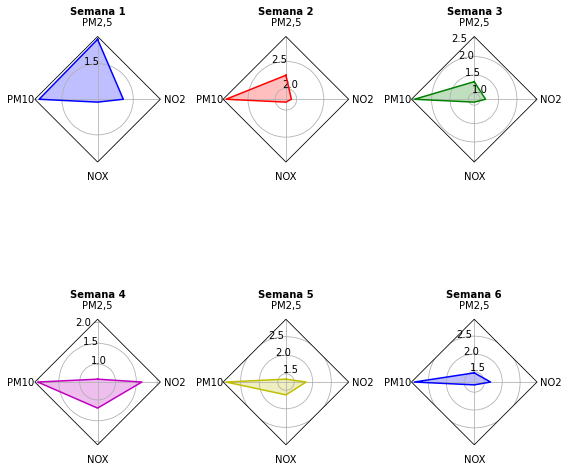

In [34]:
alldata = []
alldata.append(dataset1)
alldata.append(dataset2)
alldata.append(dataset3)
alldata.append(dataset4)
title = 'Contaminantes-'+año
spoke_labels = ['PM2,5','PM10','NOX','NO2']
titles = titles = ['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4', 'Semana 5', 'Semana 6']
colors = ['b', 'r', 'g', 'm', 'y', 'b']
visualization_spiderwebs.create_spiderwebs(alldata, 4, 6, title, titles, spoke_labels, colors, 'polygon')